# CLASSWORK3_REDDIT APP DATA

# AUTHENTICATION

In [1]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="5FRbgiDqpgtd7_Vv6ekKPQ",
    client_secret="E0-M3cQKRpKisIzziqPLFhUTG6tfYw",
    user_agent=user_agent
)

## IMPORTING PACKAGES

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## SELECT TRENDING TOPIC FROM REDDIT 

The **"bitcoin"** subreddit channel will be use for this project

In [3]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
197
0.94
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


**GET TOTAL COMMENT IN SUBREDDIT**

In [4]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

785


## SCRAPPED DATA

In [5]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Contributing to ETF custodial holdings
1,Bitcoin has outperformed EVERY MAJOR ASSET for...
2,Kind of confused by this. Never received Bitco...
3,why do different spot bitcoin etfs have differ...
4,UTXO Consolidation


In [6]:
df = bitcoin_df.iloc[:, 1:]#removes unwanted columns in left
bitcoin_df.head()

,0
0,Contributing to ETF custodial holdings
1,Bitcoin has outperformed EVERY MAJOR ASSET for...
2,Kind of confused by this. Never received Bitco...
3,why do different spot bitcoin etfs have differ...
4,UTXO Consolidation


In [7]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
bitcoin_df.columns = ['Titles']

In [9]:
bitcoin_df.head()

,Titles
0,Contributing to ETF custodial holdings
1,Bitcoin has outperformed EVERY MAJOR ASSET for...
2,Kind of confused by this. Never received Bitco...
3,why do different spot bitcoin etfs have differ...
4,UTXO Consolidation


In [10]:
bitcoin_df.Titles.duplicated().sum() 

0

## TWITTER DATA PREPROCESSING FOR BITCOIN ANALYSIS

In [11]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Contributing to ETF custodial holdings
1,Bitcoin has outperformed EVERY MAJOR ASSET for...
2,Kind of confused by this. Never received Bitco...
3,why do different spot bitcoin etfs have differ...
4,UTXO Consolidation


## REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS

In [12]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Contributing to ETF custodial holdings
1,Bitcoin has outperformed EVERY MAJOR ASSET for...
2,Kind of confused by this. Never received Bitco...
3,why do different spot bitcoin etfs have differ...
4,UTXO Consolidation


## TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD

In [13]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF BITCOIN RELATED TEXT

In [14]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Contributing to ETF custodial holdings,0.000000,0.00000
1,Bitcoin has outperformed EVERY MAJOR ASSET for...,0.283333,0.03125
2,Kind of confused by this. Never received Bitco...,0.800000,0.10000
3,why do different spot bitcoin etfs have differ...,0.600000,0.00000
4,UTXO Consolidation,0.000000,0.00000


## CATEGORIZING BITCOIN SENTIMENT

In [ ]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

# Data Visualization

In [16]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### VISUALIZING BITCOIN SENTIMENT DISTRIBUTION

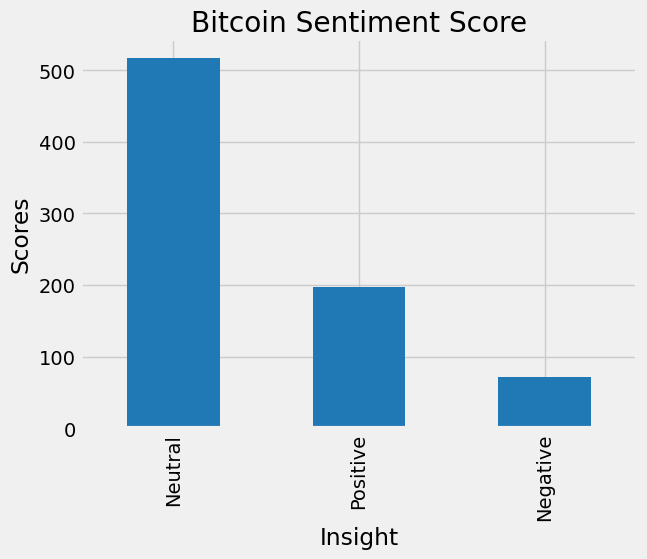

In [17]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# WORDCLOUD FOR BITCOIN

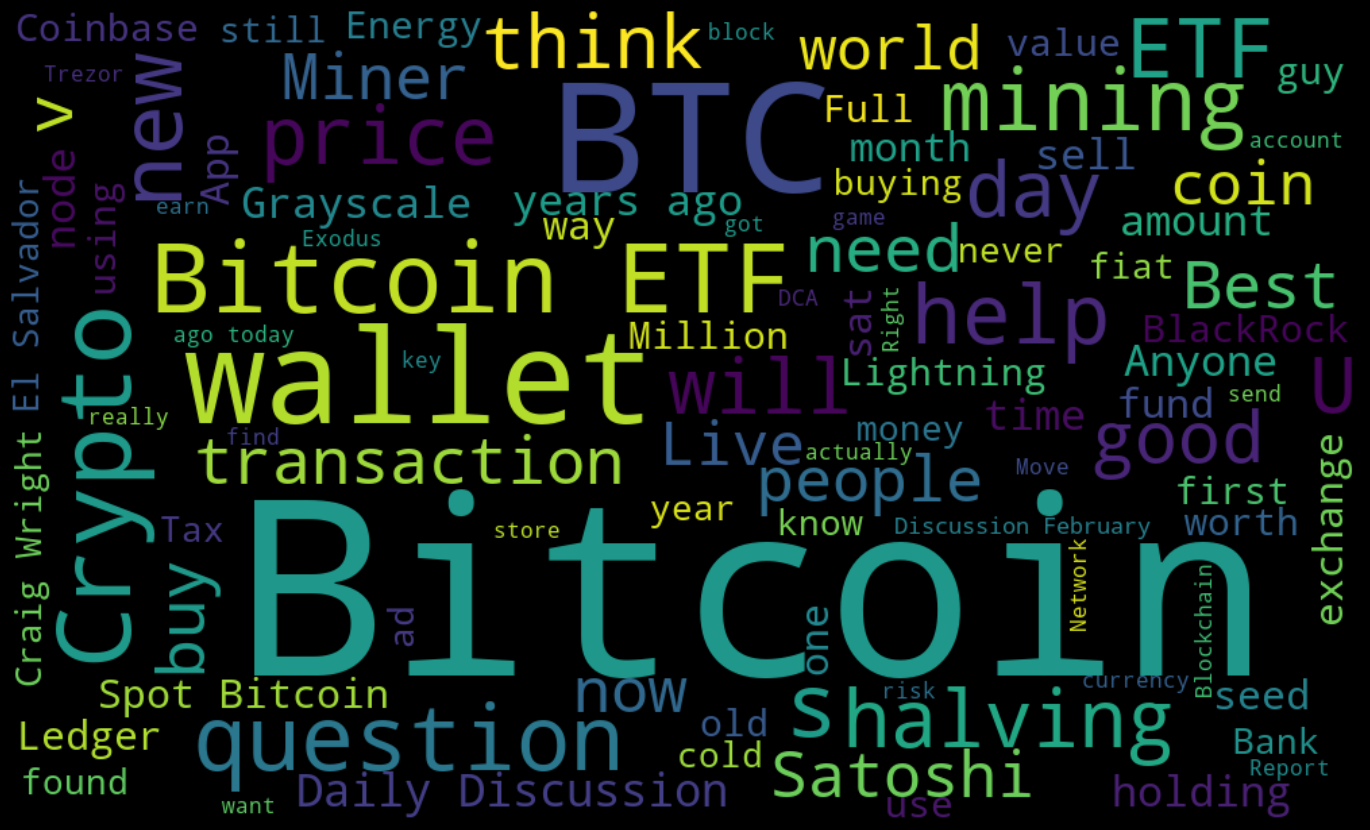

In [18]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");